In [3]:
import emip_toolkit as emtk
import filter_fixation as ff
%load_ext autoreload
%autoreload 2

In [7]:
pixel_data = ff.process_GazeBase('datasets/GazeBase_TEX/Data/S_1001_S2_TEX.csv')
fixations, saccades = ff.filter_fixations(pixel_data)

test_trial = emtk.Trial(trial_id=2,
                       participant_id="001",
                       image="TEX_R1S2_bg.png",
                       fixations=fixations,
                       saccades=saccades,
                       blinks={},
                       samples={},
                       eye_tracker="EyeLink1000_")

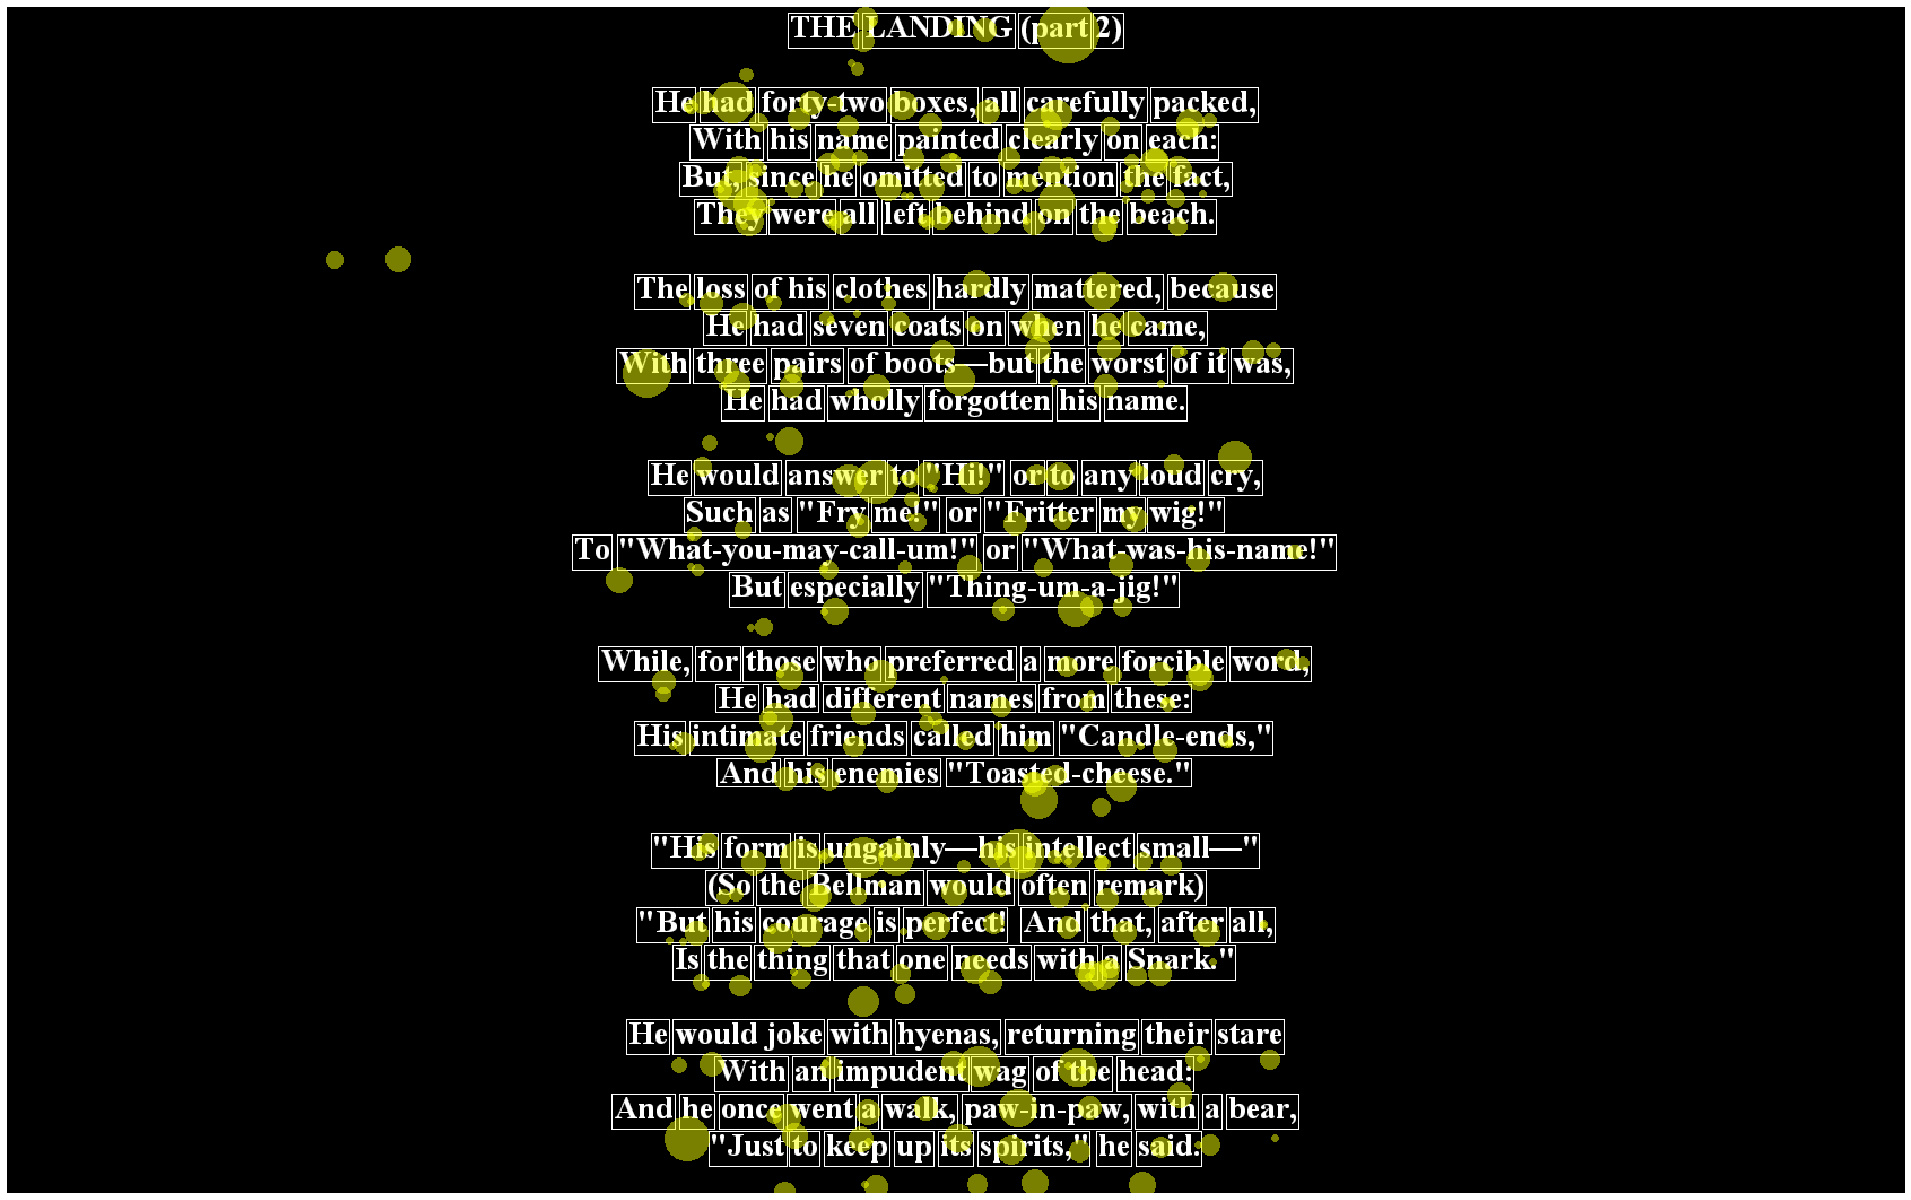

In [8]:
image_path = 'datasets/GazeBase_TEX/StimuliExamples/TEXScreenshots/'
test_trial.draw_trial(image_path=image_path, draw_saccade=False, draw_aoi=True, draw_number=False)

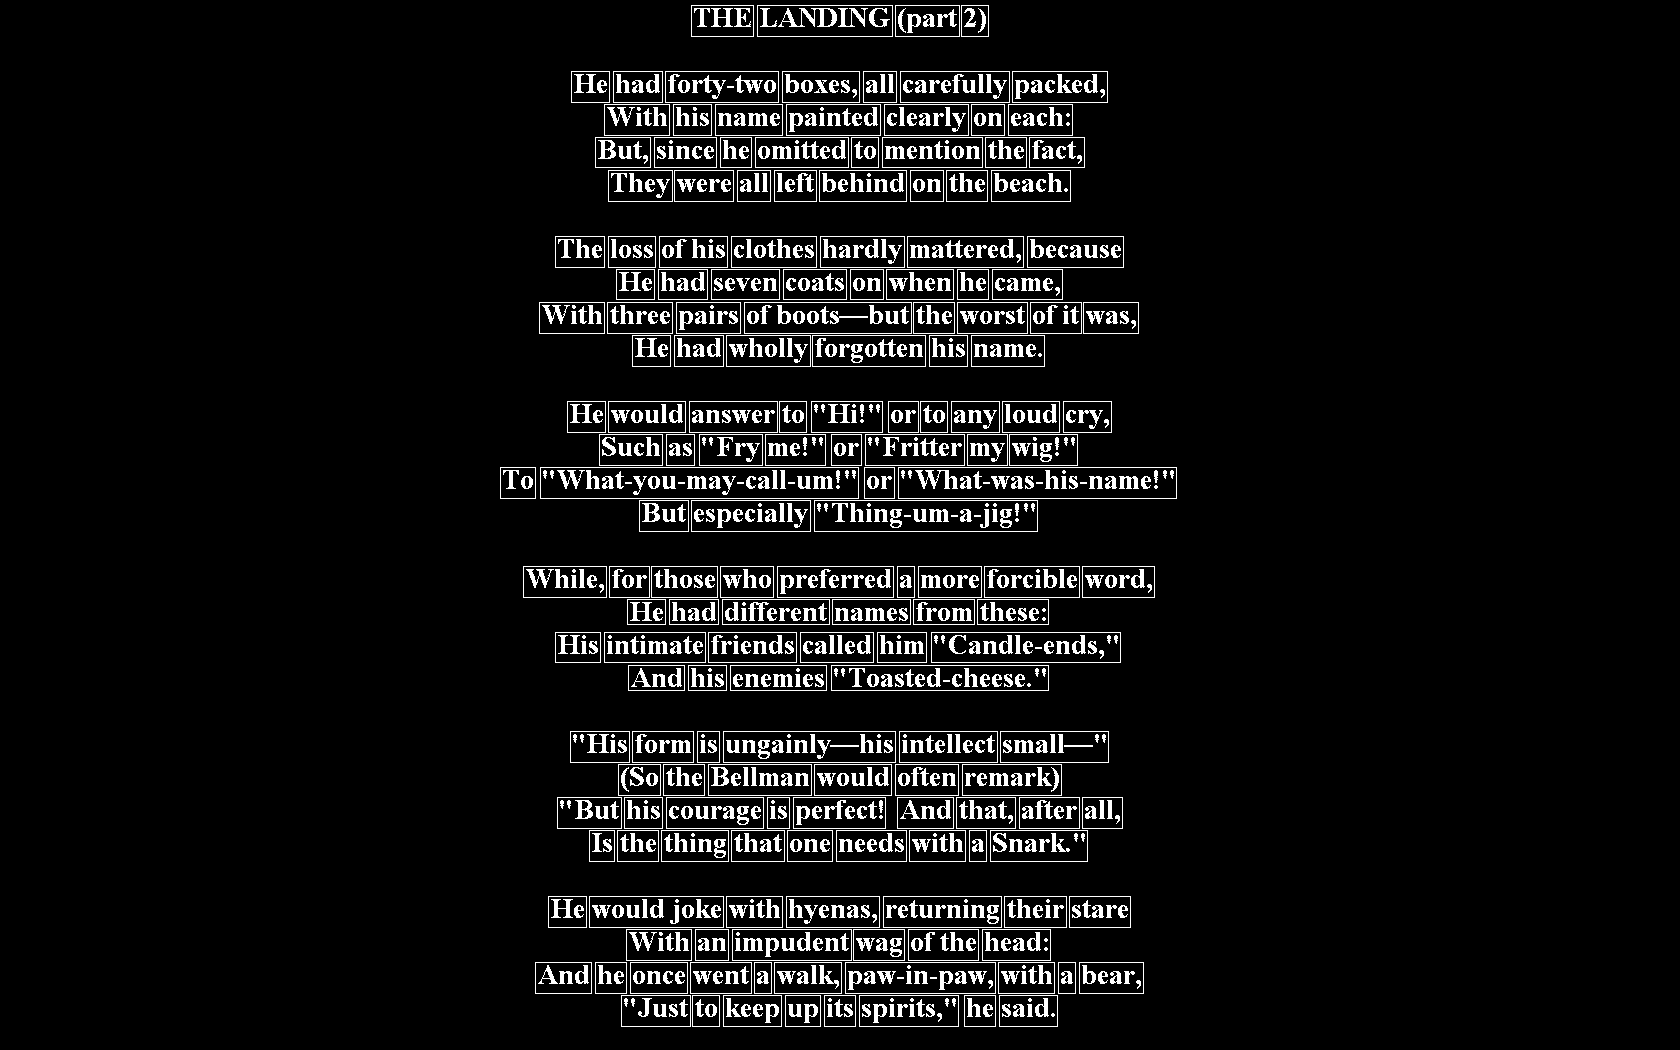

In [6]:
aoi = emtk.find_aoi(image='TEX_R1S2_bg.png', image_path=image_path)

emtk.draw_aoi(aoi, image='TEX_R1S2_bg.png', image_path=image_path)

In [7]:
aoi.head()

,kind,name,x,y,width,height,local_id,image
0,sub-line,line 1 part 1,739.5,5,63,26,NaN,TEX_R1S1_bg.png
1,sub-line,line 1 part 2,805.5,5,136,26,NaN,TEX_R1S1_bg.png
2,sub-line,line 2 part 1,553.5,71,70,32,NaN,TEX_R1S1_bg.png
3,sub-line,line 2 part 2,624.5,71,42,32,NaN,TEX_R1S1_bg.png
4,sub-line,line 2 part 3,669.5,71,66,32,NaN,TEX_R1S1_bg.png


In [8]:
file_path = 'datasets/GazeBase_TEX/StimuliExamples/TEXTexts/'
aoi_token = emtk.add_tokens_to_AOIs(file_path=file_path, aois_raw=aoi)
aoi_token

,kind,name,x,y,width,height,local_id,image,token
0,sub-line,line 1 part 1,739.5,5,63,26,NaN,TEX_R1S1_bg.png,THE
1,sub-line,line 1 part 2,805.5,5,136,26,NaN,TEX_R1S1_bg.png,LANDING
2,sub-line,line 2 part 1,553.5,71,70,32,NaN,TEX_R1S1_bg.png,"""Just"
3,sub-line,line 2 part 2,624.5,71,42,32,NaN,TEX_R1S1_bg.png,the
4,sub-line,line 2 part 3,669.5,71,66,32,NaN,TEX_R1S1_bg.png,place
...,...,...,...,...,...,...,...,...,...
187,sub-line,line 25 part 5,810.5,995,50,32,NaN,TEX_R1S1_bg.png,had
188,sub-line,line 25 part 6,863.5,995,90,32,NaN,TEX_R1S1_bg.png,bought
189,sub-line,line 25 part 7,954.5,995,41,32,NaN,TEX_R1S1_bg.png,for
190,sub-line,line 25 part 8,996.5,995,42,32,NaN,TEX_R1S1_bg.png,the


In [9]:
df = emtk.hit_test(test_trial, aoi_token)

all fixations: 311


In [26]:
df.to_csv('Hit Test Result.csv')

## Mega Result

In [3]:
from tqdm import tqdm

import os
import pandas as pd

file_lst = []

tex_file_path = 'datasets/GazeBase_TEX/TEX/'
for r, d, f in os.walk(tex_file_path):
    for file_name in f:
        if file_name.endswith('TEX.csv'):
            file_lst.append(tex_file_path + file_name)

import emip_toolkit as emtk
import filter_fixation as ff
%load_ext autoreload
%autoreload 2

In [11]:
image_path = 'datasets/GazeBase_TEX/StimuliExamples/TEXScreenshots/'
file_path = 'datasets/GazeBase_TEX/StimuliExamples/TEXTexts/'

headers = ["round",
           "session",
           "participant",
           "line_part",
           "stimuli_image",
           "stimuli_text",
           "timestamp",
           "duration",
           "x_cord",
           "y_cord",
           "aoi_x",
           "aoi_y",
           "aoi_width",
           "aoi_height",
           "token",
           "length"]

mega_result = pd.DataFrame(columns=headers)

gone = []

for file in tqdm(file_lst):

    pixel_data = ff.process_GazeBase(file)
    fixations, saccades = ff.filter_fixations(pixel_data, sample_duration=1)
    
    file_name = file.split('/')[-1]
    
    round_id = file_name[2]
    participant_id = file_name[3:6]
    session_id = file_name[8]
    image = f'TEX_R{round_id}S{session_id}_bg.png'
    
    for fix in fixations.values():
        fix.trial_id = round_id + session_id
        fix.participant_id = participant_id

    for sac in saccades.values():
        sac.trial_id = round_id + session_id
        sac.participant_id = participant_id

    trial = emtk.Trial(trial_id=round_id+session_id,
                       participant_id=participant_id,
                       image=image,
                       fixations=fixations,
                       saccades=saccades,
                       blinks={},
                       samples={},
                       eye_tracker="EyeLink1000_")
    
    aoi = emtk.find_aoi(image=trial.image, image_path=image_path)
    aoi_token = emtk.add_tokens_to_AOIs(file_path=file_path, aois_raw=aoi)
    df = emtk.hit_test_GazeBase(trial, aoi_token)
    
    mega_result = pd.concat([mega_result, df])

  1%|▍                                      | 17/1762 [03:31<6:01:22, 12.43s/it]


KeyboardInterrupt: 

In [1]:
%store -r mega1
%store -r mega2
%store -r mega3
%store -r mega4

In [3]:
import pandas as pd

In [5]:
mega_result = pd.concat([mega1, mega2, mega3, mega4])

In [264]:
mega_result.to_csv('Hit_Test_Result.csv')

In [7]:
mega_result.reset_index(inplace=True)

In [8]:
datatype = {'index': str,
            'round': str, 
            'session': str,
            'line_part': str,
            'participant': str,
            'stimuli_image': str,
            'stimuli_text': str,
            'duration': 'int64',
            'x_cord': 'float64',
            'y_cord': 'float64',
            'aoi_x': 'float64',
            'aoi_y': 'float64', 
            'aoi_width': 'float64', 
            'aoi_height': 'float64',
            'token': str,
            'length': 'int64'}

mega_result = mega_result.astype(datatype)

In [9]:
mega_result.dtypes

index             object
round             object
session           object
participant       object
line_part         object
stimuli_image     object
stimuli_text      object
timestamp        float64
duration           int64
x_cord           float64
y_cord           float64
aoi_x            float64
aoi_y            float64
aoi_width        float64
aoi_height       float64
token             object
length             int64
dtype: object

In [10]:
mega_result['index'] = mega_result['round'] + mega_result['session'] + mega_result['participant'] + '_' + mega_result['index']

In [11]:
mega_result.to_csv('raw_result.csv')

In [12]:
df = pd.read_csv('raw_result.csv', dtype=datatype)

In [13]:
df.dtypes

Unnamed: 0         int64
index             object
round             object
session           object
participant       object
line_part         object
stimuli_image     object
stimuli_text      object
timestamp        float64
duration           int64
x_cord           float64
y_cord           float64
aoi_x            float64
aoi_y            float64
aoi_width        float64
aoi_height       float64
token             object
length             int64
dtype: object

In [14]:
df

,Unnamed: 0,index,round,session,participant,line_part,stimuli_image,stimuli_text,timestamp,duration,x_cord,y_cord,aoi_x,aoi_y,aoi_width,aoi_height,token,length
0,0,11001_0,1,1,001,line 12 part 3,TEX_R1S1_bg.png,TEX_R1S1_text.txt,263.0,120,722.360000,488.112500,700.5,467.0,102.0,32.0,brought,7
1,1,11001_1,1,1,001,line 13 part 3,TEX_R1S1_bg.png,TEX_R1S1_text.txt,263.0,120,722.360000,488.112500,708.5,500.0,96.0,32.0,"Broker,",7
2,2,11001_2,1,1,001,line 12 part 3,TEX_R1S1_bg.png,TEX_R1S1_text.txt,519.0,255,736.400394,491.933725,700.5,467.0,102.0,32.0,brought,7
3,3,11001_3,1,1,001,line 13 part 3,TEX_R1S1_bg.png,TEX_R1S1_text.txt,519.0,255,736.400394,491.933725,708.5,500.0,96.0,32.0,"Broker,",7
4,4,11001_4,1,1,001,line 12 part 4,TEX_R1S1_bg.png,TEX_R1S1_text.txt,698.0,161,809.180746,494.226708,803.5,467.0,28.0,32.0,to,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537661,537661,92314_304,9,2,314,line 7 part 5,TEX_R9S2_bg.png,TEX_R9S2_text.txt,59424.0,70,1043.085715,265.241425,928.5,269.0,159.0,32.0,every,5
537662,537662,92314_305,9,2,314,line 6 part 6,TEX_R9S2_bg.png,TEX_R9S2_text.txt,59573.0,148,1046.345271,264.358783,946.5,236.0,130.0,32.0,frequently,10
537663,537663,92314_306,9,2,314,line 7 part 5,TEX_R9S2_bg.png,TEX_R9S2_text.txt,59573.0,148,1046.345271,264.358783,928.5,269.0,159.0,32.0,every,5
537664,537664,92314_307,9,2,314,line 6 part 7,TEX_R9S2_bg.png,TEX_R9S2_text.txt,59946.0,364,1081.592856,260.325826,1077.5,236.0,65.0,32.0,finds,5


In [16]:
import string
df['token'] = df['token'].str.lower().str.strip(string.punctuation)
df['length'] = df['token'].str.len()

In [17]:
df.to_csv('processed_result.csv')

In [18]:
frequency = pd.read_csv('tokens_freq.csv')

In [19]:
frequency.set_index('Word', inplace=True)

In [20]:
freq = frequency.groupby('Word').max()

In [21]:
freq_dict = freq.to_dict()

In [22]:
freq_dict

{' Lemma Head': {'a': ' a',
  'able': ' able',
  'aboard': ' aboard',
  'about': ' about',
  'absolute': ' absolute',
  'absurd': ' absurd',
  'add': ' add',
  'added': ' add',
  'additional': ' additional',
  'advised': ' advise',
  'affectionate': ' affectionate',
  'after': ' after',
  'again': ' again',
  'against': ' against',
  'ages': ' age',
  'agree': ' agree',
  'ahead': ' ahead',
  'all': ' all',
  'almost': ' almost',
  'alone': ' alone',
  'along': ' along',
  'already': ' already',
  'also': ' also',
  'although': ' although',
  'always': ' always',
  'am': ' be',
  'ambition': ' ambition',
  'among': ' among',
  'amount': ' amount',
  'amply': ' amply',
  'an': ' an',
  'and': ' and',
  'angrily': ' angrily',
  'another': ' another',
  'answer': ' answer',
  'antediluvian': ' antediluvian',
  'any': ' any',
  'appeal': ' appeal',
  'appeared': ' appear',
  'approach': ' approach',
  'are': ' be',
  'arrange': ' arrange',
  'arrangement': ' arrangement',
  'art': ' be',
 

In [23]:
df['CobMln'] = df.token.apply(lambda x: freq_dict[' CobMln'].get(x, 1))

In [24]:
df.to_csv('freq_result.csv')